In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('clean_df_3_multi_weapon.csv')
df.head()

,Victim Sex,Victim Age,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Ethnicity,Victim Race/Ethinicty,Perpetrator Race/Ethinicty,Season,Region,Weapon Category,Relationship Category
0,Male,14,Unknown,Male,15,Unknown,Native American/Alaska Native Unknown,Native American/Alaska Native Unknown,Winter,West Coast,Blunt Force,Acquaintances and Friends
1,Male,43,Unknown,Male,42,Unknown,White Unknown,White Unknown,Spring,West Coast,Strangulation and Suffocation,Acquaintances and Friends
2,Male,43,Unknown,Male,42,Unknown,White Unknown,White Unknown,Spring,West Coast,Strangulation and Suffocation,Acquaintances and Friends
3,Male,30,Unknown,Male,36,Unknown,White Unknown,White Unknown,Spring,West Coast,Firearms,Acquaintances and Friends
4,Female,42,Unknown,Male,27,Unknown,Native American/Alaska Native Unknown,Black Unknown,Spring,West Coast,Sharp Weapons,Family


In [3]:
df.columns

Index(['Victim Sex', 'Victim Age', 'Victim Ethnicity', 'Perpetrator Sex',
       'Perpetrator Age', 'Perpetrator Ethnicity', 'Victim Race/Ethinicty',
       'Perpetrator Race/Ethinicty', 'Season', 'Region', 'Weapon Category',
       'Relationship Category'],
      dtype='object')

In [4]:
# 1. Clean Data
categorical_columns = ['Victim Sex', 'Victim Age', 'Victim Ethnicity', 'Perpetrator Sex',
       'Perpetrator Age', 'Perpetrator Ethnicity', 'Victim Race/Ethinicty',
       'Perpetrator Race/Ethinicty', 'Season', 'Region', 'Relationship Category']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

target_encoder = LabelEncoder()
df["Weapon Category"] = target_encoder.fit_transform(df["Weapon Category"]) 

X = df.drop(columns=["Weapon Category"])
y = df["Weapon Category"]


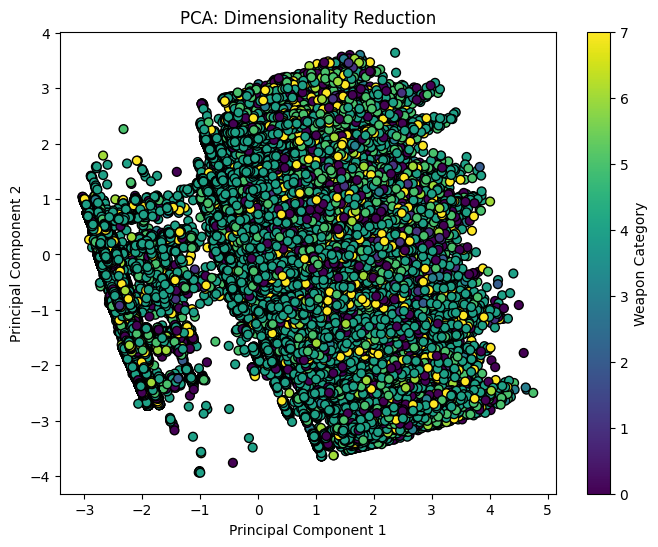

In [6]:
# 2. PCA (Work better on this)


In [5]:
# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
# 4. Build and Train the ANN Model

# Build the ANN model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define input shape explicitly
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(df['Weapon Category'].unique()), activation='softmax')  # Output layer
])
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
# history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/50
35815/35815 ━━━━━━━━━━━━━━━━━━━━ 27s 747us/step - accuracy: 0.6638 - loss: 0.9950 - val_accuracy: 0.6693 - val_loss: 0.9616
Epoch 2/50
35815/35815 ━━━━━━━━━━━━━━━━━━━━ 27s 741us/step - accuracy: 0.6687 - loss: 0.9651 - val_accuracy: 0.6695 - val_loss: 0.9583
Epoch 3/50
35815/35815 ━━━━━━━━━━━━━━━━━━━━ 31s 875us/step - accuracy: 0.6714 - loss: 0.9581 - val_accuracy: 0.6700 - val_loss: 0.9597
Epoch 4/50
35815/35815 ━━━━━━━━━━━━━━━━━━━━ 71s 2ms/step - accuracy: 0.6712 - loss: 0.9549 - val_accuracy: 0.6708 - val_loss: 0.9533
Epoch 5/50
35815/35815 ━━━━━━━━━━━━━━━━━━━━ 39s 1ms/step - accuracy: 0.6718 - loss: 0.9557 - val_accuracy: 0.6705 - val_loss: 0.9540
Epoch 6/50
35815/35815 ━━━━━━━━━━━━━━━━━━━━ 46s 1ms/step - accuracy: 0.6724 - loss: 0.9515 - val_accuracy: 0.6702 - val_loss: 0.9543
Epoch 7/50
35815/35815 ━━━━━━━━━━━━━━━━━━━━ 61s 2ms/step - accuracy: 0.6712 - loss: 0.9528 - val_accuracy: 0.6710 - val_loss: 0.9547
Epoch 8/50
35815/35815 ━━━━━━━━━━━━━━━━━━━━ 79s 2ms/step - accu

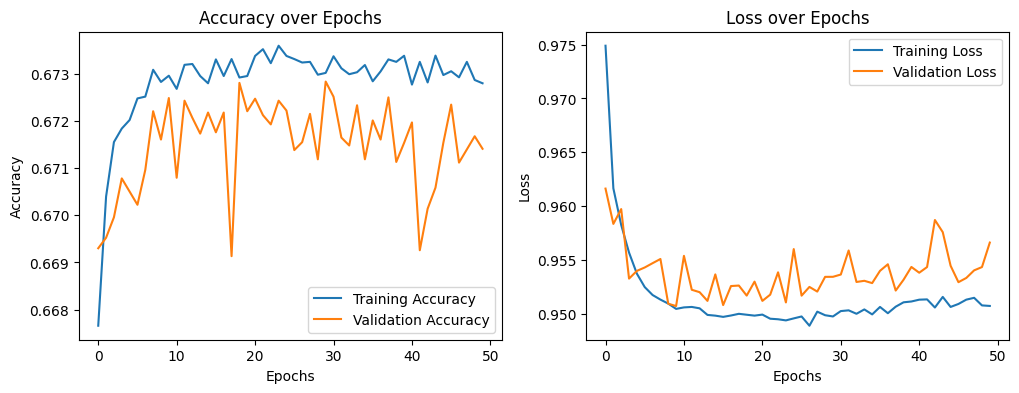

In [10]:
# 5. Evaluate the Model
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

2799/2799 ━━━━━━━━━━━━━━━━━━━━ 1s 425us/step


<Figure size 1000x700 with 0 Axes>

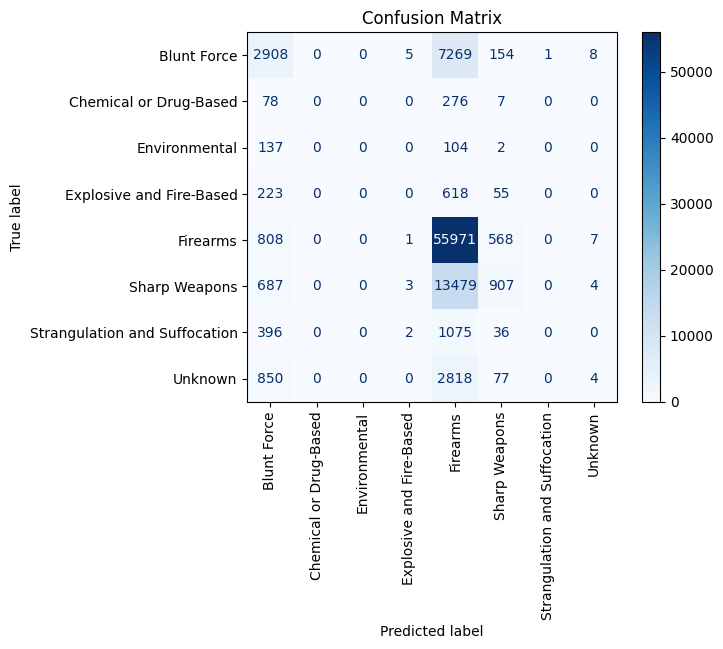


Classification Report:
                               precision    recall  f1-score   support

                  Blunt Force       0.48      0.28      0.35     10345
       Chemical or Drug-Based       0.00      0.00      0.00       361
                Environmental       0.00      0.00      0.00       243
     Explosive and Fire-Based       0.00      0.00      0.00       896
                     Firearms       0.69      0.98      0.81     57355
                Sharp Weapons       0.50      0.06      0.11     15080
Strangulation and Suffocation       0.00      0.00      0.00      1509
                      Unknown       0.17      0.00      0.00      3749

                     accuracy                           0.67     89538
                    macro avg       0.23      0.16      0.16     89538
                 weighted avg       0.59      0.67      0.58     89538


In [12]:
# Predict the classes
predictions = model.predict(X_test)
predicted_classes = predictions.argmax(axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_encoder.classes_)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
disp.plot(cmap=plt.cm.Blues, values_format="d", xticks_rotation=90)  # Rotate x-axis labels
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, predicted_classes, target_names=target_encoder.classes_, zero_division=0))

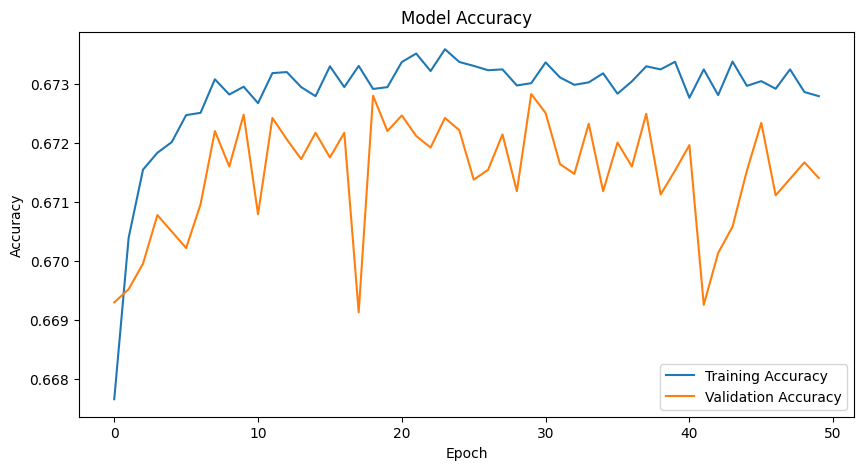

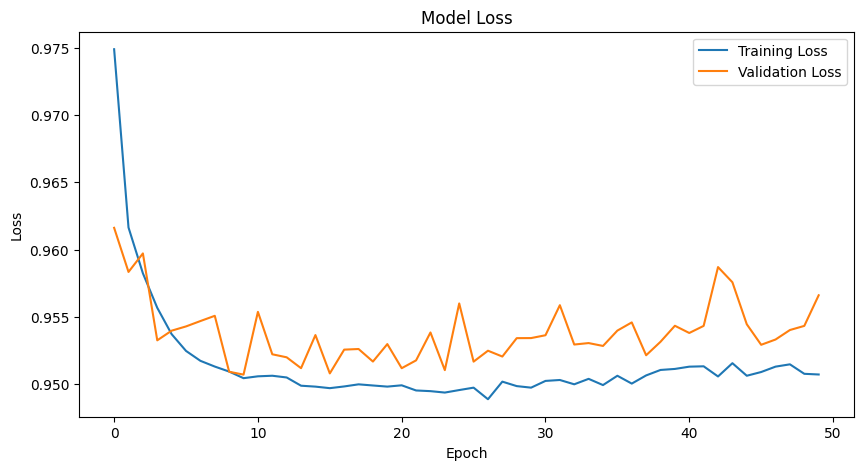

In [13]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [36]:
print("Available keys in history:", model.history.keys())

AttributeError: 'History' object has no attribute 'keys'